<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/NLP/Project/NLP_Project_Rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import the libraries, load dataset, print shape of data, data description

In [1]:
!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

     |████████████████████████████████| 266kB 7.4MB/s 
     |████████████████████████████████| 327kB 15.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85391 sha256=122615a154a4b5d2e13e73e558c1be90b75c142c5274068ac760faf604c62b5a
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
# load dataset
data = pd.read_csv('https://github.com/vasantbala/vb_ai_course/blob/main/NLP/Project/Tweets.csv?raw=true')

In [4]:
# print shape of data
data.shape

(14640, 15)

In [6]:
# data description
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 2. Understand of data-columns

### 2.a Drop all other columns except “text” and “airline_sentiment”.


In [92]:
trimmed_data = data.copy(deep=True)
for col in data.columns:
  if (col != 'airline_sentiment' and col != 'text'):
    trimmed_data.drop([col], axis=1, inplace=True)

### 2.b Check the shape of data

In [93]:

trimmed_data.shape

(14640, 2)

### 2.c Print first 5 rows of data.

In [94]:

trimmed_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## 3. Text pre-processing: Data preparation

### 3.a Html tag removal.

In [95]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: strip_html(x))
trimmed_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [96]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: replace_contractions(x))
trimmed_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


### 3.b Tokenization

In [97]:
trimmed_data['text'] = trimmed_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [98]:
for i in trimmed_data['text'][0]:
  print(i)

@
VirginAmerica
What
@
dhepburn
said
.


### 3.c Remove the numbers

In [99]:
trimmed_data['text'][0]

['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']

In [100]:
def remove_numbers(textList):
  for tokenIndex in range(0, len(textList)):
    textList[tokenIndex] = re.sub(r'\d+', '', textList[tokenIndex])
  return textList

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: remove_numbers(x))


In [101]:
trimmed_data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


### 3.d Removal of Special Characters and Punctuations

In [102]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: remove_punctuation(x))    

### 3.e Conversion to lowercase

In [103]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: to_lowercase(x))    
trimmed_data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


### 3.f Lemmatize or stemming

In [104]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: lemmatize_list(x))    
trimmed_data.head()    

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, have, add, commerci..."
2,neutral,"[virginamerica, i, do, not, today, must, mean,..."
3,negative,"[virginamerica, it, be, really, aggressive, to..."
4,negative,"[virginamerica, and, it, be, a, really, big, b..."


### 3.g Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)


In [105]:
def normalize(words):   
    return ' '.join(words)
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: normalize(x))    

### 3.h Print first 5 rows of data after pre-processing


In [75]:
trimmed_data.head()  

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


## 4. Vectorization

In [106]:
trimmed_data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["negative", "neutral", "positive"])
list(le.classes_)
trimmed_data['label'] = le.transform(trimmed_data['airline_sentiment'])

### 4.a Use CountVectorizer

In [110]:
data_for_countVectorizer = trimmed_data.copy(deep=True)

In [111]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

ct_vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
cv_data_features = ct_vectorizer.fit_transform(data_for_countVectorizer['text'])
cv_data_features = cv_data_features.toarray()                        # Convert the data features to array.

In [112]:
cv_data_features.shape

(14640, 1000)

In [113]:
cv_labels = data_for_countVectorizer['label']
cv_labels = cv_labels.astype('int')

### 4.b Use TfidfVectorizer

In [114]:
data_for_TfidfVectorizer = trimmed_data.copy(deep=True)

In [115]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=1000)
tv_data_features = t_vectorizer.fit_transform(data_for_TfidfVectorizer['text'])

tv_data_features = tv_data_features.toarray()

tv_data_features.shape

(14640, 1000)

## 5. Fit and evaluate model using both type of vectorization

### 5.a Fit and model evaluation for CountVectorizer

In [116]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cv_data_features, cv_labels, test_size=0.3, random_state=42)

In [117]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, cv_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7173497267759563


In [118]:
# Predict the result for test data using the model built above.
cv_result = forest.predict(X_test)

[[2639  122   53]
 [ 456  371   57]
 [ 253  115  326]]


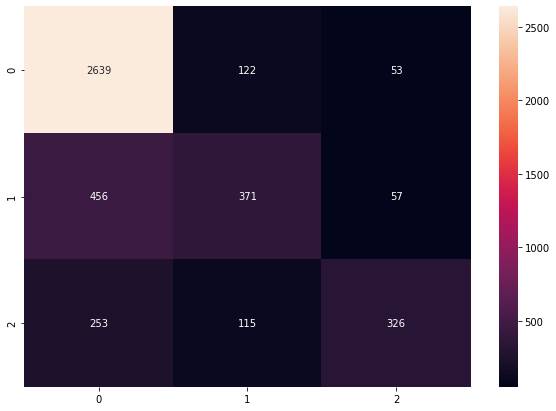

In [119]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, cv_result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 3)],
                  columns = [i for i in range(0, 3)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### 5.b Fit for t

In [120]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
tv_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
tv_forest = tv_forest.fit(X_train, y_train)
print(tv_forest)
print(np.mean(cross_val_score(tv_forest, tv_data_features, cv_labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7171448087431693


In [121]:
tv_result = tv_forest.predict(X_test)

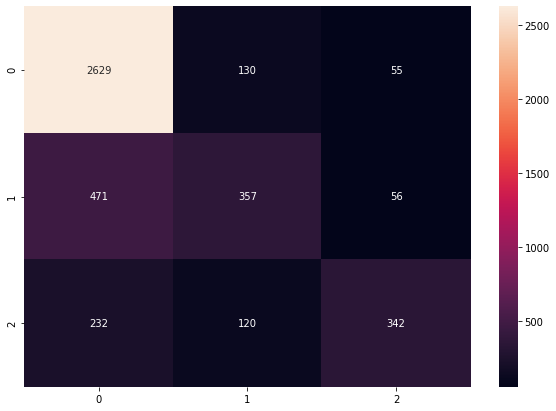

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 3)],
                  columns = [i for i in range(0, 3)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

Summary:


1. We used dataset which has reviews in text format and their sentiment score on the scale of 0 to 2
2. The goal was to build a model for sentiment analysis for the reviews obtained from user tweets.
3. We Pre-processed the data using variuos techniques and libraries.
The pre-precessed data is converted to numbers, so that we can feed the data in the model.
4. After building the classification model, we predicted the result for the test data.
5. After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
6. One way to increase accuracy is to use different variations of Pre-processing techniques.